Develop Project Proposal:
Description:
Yelp Inc. is an American company that develops and operates Yelp.com website and the Yelp mobile app, which publish crowd-sourced reviews about businesses. Our client CoffeeKing is a new startup coffee company providing a unique and novel experience to their customers.  They want to appeal to a wide variety of clientele. 
CoffeKing our client, or to be general any company wanting to enter the coffee-shop / café market segment in the restaurant business would be interested in my analysis. The primary audience shall be my Manager (the Head of Data Analytics team); furthermore, the account manager in my company targeting sales to the restaurant and hospitality industry shall be the next level of audience. Finally, after due approval and vetting internally, the actual client CoffeeKing shall be the final audience.

For the analysis I shall be using Yelp reviews and user data to provide insights to CoffeeKing for things such as location selection, hours of operation, facilities offered, and amenities they are providing. I will be using the Business dataset and Review dataset to gain insights to help CoffeeKing reach large swaths of customer base. I will be looking at various features provided by my data set. Specifically, the location details, the attributes, the category and the time of operations. 
Questions:
1.	Are the Restaurants liked on the basis of category they belong to; is it dependent on food they serve?
2.	Are Amenities like parking, ambience etc. they provide detrimental in attracting more people? 
3.	Does location of a restaurant matter? Should CoffeeKing open more outlets in big cities or smaller places?
4.	Should my client focus more on the quality and efficiency of the services they offer?

Hypothesis:
1.	People would love to go to places that with good amenities like parking and which are more casual
2.	They would have liking for a particular cuisine.
3.	 Service and excellent food and Coffee would be the reason they go to a certain restaurant.
4.	Affordability shall be a key factor guiding customer decisions.


Approach:
1.	Start with analysis of the Business Dataset, look at the attributes.
2.	Analyze the categories.
3.	Look at the number of Restaurants in big cities.
4.	Evaluate the review dataset, analyze the reviews and then look out for things that people like and dislike about the restaurants by analysis of their reviews.
5.	I shall evaluate that with frequency metrics using word cloud.
6.	 Look for word count and word frequency (plus – TFID) for sentiment analysis and topic analysis.

Preparing for Your Proposal
1.	I chose Coffee King, a company running coffee chains across North America as my client because I am fascinated by the business model of coffee chains.
2.	I have used pandas to import the data sets into my Jupiter Notebook. The dataset I needed to import was JSON data of size 4.04 GB. The data contained 5 different datasets which are as following:
a.	yelp_academic_dataset_business
b.	yelp_academic_dataset_user
c.	yelp_academic_dataset_reviews
d.	yelp_academic_dataset_tip
e.	yelp_academic_dataset_checkin
3.	Importing Dataset: The main challenge was to import such a large dataset into Jupyter Notebook for analysis. When processing very large files or figuring out the right set of arguments to correctly process a large file, we may only want to read in a small piece of a file or iterate through smaller chunks of the file. My code for importing the data set yelp_academic_dataset_business is as in Fig 1.1


In [25]:
import ndjson
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

b_pandas=[]
rd_types={"postal_code":np.int32,
            
            "stars": np.float16,
          "review_count": np.int32,
        
          "is_open":np.bool_,
         }

f= open("yelp_academic_dataset_business.json",encoding='utf-8') 
reader=pd.read_json(f,orient="records",lines=True,chunksize=1000)

for chunk in reader:
    reduced_chunk=chunk.drop(columns=['address'])
    b_pandas.append(reduced_chunk)

df_yelp_business_restaurants=pd.concat(b_pandas,ignore_index=True)
df_yelp_business_restaurants.head()


,business_id,name,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [26]:
import ast
from pandas.io.json import json_normalize

def only_dict(d):
    '''
    Convert json string representation of dictionary to a python dict
    '''
    return ast.literal_eval(d)

def list_of_dicts(ld):
    '''
    Create a mapping of the tuples formed after 
    converting json strings of list to a python list   
    '''
    return dict([(list(d.values())[1], list(d.values())[0]) for d in ast.literal_eval(ld)])

#A = json_normalize(d['Ambience'].apply(only_dict).tolist())
#B = json_normalize(d['BusinessParking'].apply(only_dict).tolist())
#B = json_normalize(d['columnB'].apply(list_of_dicts).tolist()).add_prefix('columnB.pos.')


#timing = json_normalize(df_yelp_business_restaurants["hours"].apply(only_dict).tolist())
#B = json_normalize(df_yelp_business_restaurants["hours"].apply(list_of_dicts))

df_yelp_business_restaurants["hours"][0]

In [27]:
df_yelp_business_restaurants[["categories_1","categories_2","categories_3","categories_4","categories_5"]] = df_yelp_business_restaurants["categories"].str.split(',',n = 4, expand = True)
                 
#df_yelp_business_restaurants =  df_yelp_business_restaurants.drop(['categories'], axis=1)
#df_yelp_business_restaurants =  df_yelp_business_restaurants.drop(['categories_3'], axis=1)
#df_yelp_business_restaurants['categories_1'].str.cat(df_yelp_business_restaurants[["categories_1", "categories_2"]], sep='')
df_yelp_business_restaurants[:60]


#df_cat.drop(2, axis = 1)

#df['Address'].str.split(',', expand=True)



,business_id,name,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,categories_1,categories_2,categories_3,categories_4,categories_5
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,Doctors,Traditional Chinese Medicine,Naturopathic/Holistic,Acupuncture,"Health & Medical, Nutritionists"
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",Shipping Centers,Local Services,Notaries,Mailbox Centers,Printing Services
2,tUFrWirKiKi_TAnsVWINQQ,Target,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",Department Stores,Shopping,Fashion,Home & Garden,"Electronics, Furniture Stores"
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",Restaurants,Food,Bubble Tea,Coffee & Tea,Bakeries
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",Brewpubs,Breweries,Food,None,None
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",Burgers,Fast Food,Sandwiches,Food,"Ice Cream & Frozen Yogurt, Restaurants"
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,Brentwood,MO,63144,38.627695,-90.340465,2.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sporting Goods, Fashion, Shoe Stores, Shopping...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ...",Sporting Goods,Fashion,Shoe Stores,Shopping,"Sports Wear, Accessories"
7,qkRM_2X51Yqxk3btlwAQIg,Temple Beth-El,St. Petersburg,FL,33707,27.766590,-82.732983,3.5,5,1,None,"Synagogues, Religious Organizations","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ...",Synagogues,Religious Organizations,None,None,None
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None,Pubs,Restaurants,Italian,Bars,"American (Traditional), Nightlife, Greek"
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...",Ice Cream & Frozen Yogurt,Fast Food,Burgers,Restaurants,Food


In [28]:
df_yelp_business_restaurants.describe()

,latitude,longitude,stars,review_count,is_open
count,150346.000000,150346.000000,150346.000000,150346.000000,150346.00000
mean,36.671150,-89.357339,3.596724,44.866561,0.79615
std,5.872759,14.918502,0.974421,121.120136,0.40286
min,27.555127,-120.095137,1.000000,5.000000,0.00000
25%,32.187293,-90.357810,3.000000,8.000000,1.00000
50%,38.777413,-86.121179,3.500000,15.000000,1.00000
75%,39.954036,-75.421542,4.500000,37.000000,1.00000
max,53.679197,-73.200457,5.000000,7568.000000,1.00000


In [29]:
#Classification based on different types of Businesses

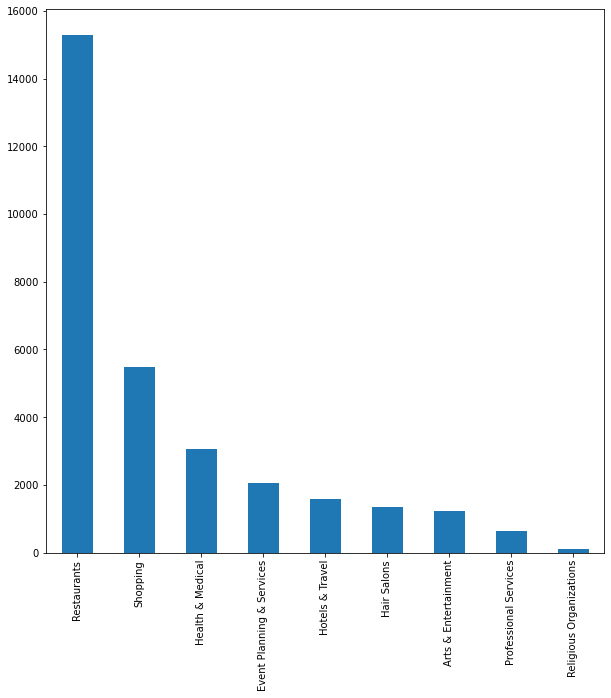

In [30]:
list_1 = df_yelp_business_restaurants['categories_1'].to_list()
list_2 = df_yelp_business_restaurants['categories_2'].to_list()
list_3 = df_yelp_business_restaurants['categories_3'].to_list()
list_4 = df_yelp_business_restaurants['categories_4'].to_list()
f_list = list_1 + list_2 + list_3 + list_4

list_d = ['Restaurants', 'Shopping', 'Religious Organizations','Professional Services','Health & Medical','Hair Salons', 'Hotels & Travel','Arts & Entertainment','Event Planning & Services']
data = [x for x in f_list if x in list_d]
data = pd.Series(data)
fig = plt.figure(figsize = (10,10))
data.value_counts().plot(kind = 'bar')
fig.savefig('distribution.jpg',dpi = 200)

In [31]:
df_yelp_business_restaurants[["Restaurants","categories_2","categories_3","categories_4","categories_5"]] = df_yelp_business_restaurants["categories"].str.split(',',n = 4, expand = True)

In [32]:
df_yelp_business_restaurants = df_yelp_business_restaurants.loc[
                                                (df_yelp_business_restaurants["Restaurants"] == 'Restaurants') | 
                                                (df_yelp_business_restaurants['categories_2'] == 'Restaurants') | 
                                                (df_yelp_business_restaurants['categories_3'] == 'Restaurants')|
                                                (df_yelp_business_restaurants["Restaurants"] == 'Coffee & Tea') | 
                                                (df_yelp_business_restaurants['categories_2'] == 'Coffee & Tea') |
                                                (df_yelp_business_restaurants['categories_3'] == 'Coffee & Tea') ]

len(df_yelp_business_restaurants)
                                   

16840

# Coffee & Tea Businesses vs Restaurants

We are here analysing data for CoffeKing, There fore tried to check how many Coffee & Tea Businesses are there as compared to Restaurants.

C:\Users\kulpr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


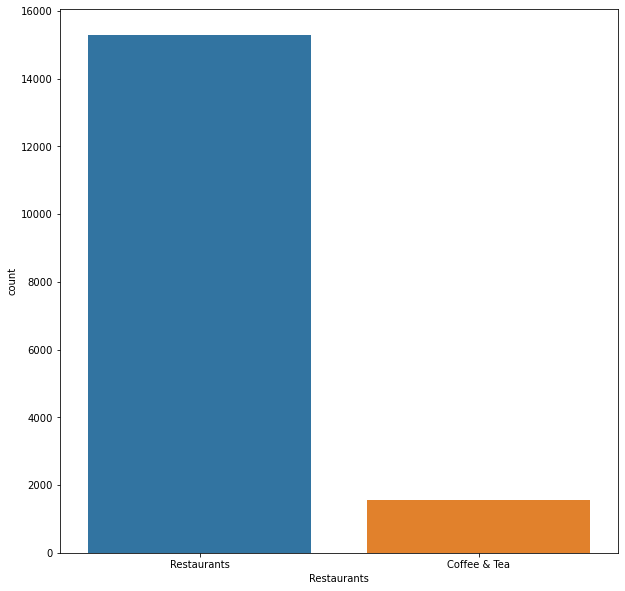

In [33]:
fig = plt.figure(figsize = (10,10))
sns.countplot(df_yelp_business_restaurants['Restaurants'])
fig.savefig('distribution.jpg',dpi = 200)

In [34]:
## select out 16 cuisine types of restaurants and rename the category
df_yelp_business_restaurants.is_copy=False
df_yelp_business_restaurants['category']=pd.Series()

df_yelp_business_restaurants.loc[df_yelp_business_restaurants.categories.str.contains('American'),'category'] = 'American'
df_yelp_business_restaurants.loc[df_yelp_business_restaurants.categories.str.contains('Afghan'),'category'] = 'Afghan'
df_yelp_business_restaurants.loc[df_yelp_business_restaurants.categories.str.contains('African'),'category'] = 'African'
df_yelp_business_restaurants.loc[df_yelp_business_restaurants.categories.str.contains('Chinese'),'category'] = 'Chinese'
df_yelp_business_restaurants.loc[df_yelp_business_restaurants.categories.str.contains('Indonesian'),'category'] = 'Indonesian'
df_yelp_business_restaurants.loc[df_yelp_business_restaurants.categories.str.contains('Filipino'),'category'] = 'Filipino'
df_yelp_business_restaurants.loc[df_yelp_business_restaurants.categories.str.contains('Korean'),'category'] = 'Korean'
df_yelp_business_restaurants.loc[df_yelp_business_restaurants.categories.str.contains('Thai'),'category'] = 'Thai'
df_yelp_business_restaurants.loc[df_yelp_business_restaurants.categories.str.contains('Vietnamese'),'category'] = 'Vietnamese'
df_yelp_business_restaurants.loc[df_yelp_business_restaurants.categories.str.contains('Caribbean'),'category'] = 'Caribbean'
df_yelp_business_restaurants.loc[df_yelp_business_restaurants.categories.str.contains('Romanian'),'category'] = 'Romanian'
df_yelp_business_restaurants.loc[df_yelp_business_restaurants.categories.str.contains('French'),'category'] = 'French'
df_yelp_business_restaurants.loc[df_yelp_business_restaurants.categories.str.contains('German'),'category'] = 'German'
df_yelp_business_restaurants.loc[df_yelp_business_restaurants.categories.str.contains('Greek'),'category'] = 'Greek'
df_yelp_business_restaurants.loc[df_yelp_business_restaurants.categories.str.contains('Austrian'),'category'] = 'Austrian'
df_yelp_business_restaurants.loc[df_yelp_business_restaurants.categories.str.contains('Pakistani'),'category'] = 'Pakistani'
df_yelp_business_restaurants.loc[df_yelp_business_restaurants.categories.str.contains('English'),'category'] = 'English'
df_yelp_business_restaurants.loc[df_yelp_business_restaurants.categories.str.contains('Indian'),'category'] = 'Indian'
df_yelp_business_restaurants.loc[df_yelp_business_restaurants.categories.str.contains('Italian'),'category'] = 'Italian'
df_yelp_business_restaurants.loc[df_yelp_business_restaurants.categories.str.contains('Moroccan'),'category'] = 'Moroccan'
df_yelp_business_restaurants.loc[df_yelp_business_restaurants.categories.str.contains('Caribbean'),'category'] = 'Caribbean'
df_yelp_business_restaurants.loc[df_yelp_business_restaurants.categories.str.contains('Portuguese'),'category'] = 'Portuguese'

df_yelp_business_restaurants.loc[df_yelp_business_restaurants.categories.str.contains( 'Brazilian'),'category'] =  'Brazilian'
df_yelp_business_restaurants.loc[df_yelp_business_restaurants.categories.str.contains("Spanish"),'category'] = "Spanish"
df_yelp_business_restaurants.loc[df_yelp_business_restaurants.categories.str.contains('Lebanese'),'category'] = 'Lebanese'
df_yelp_business_restaurants.loc[df_yelp_business_restaurants.categories.str.contains('Sri Lankan'),'category'] = 'Sri Lankan'
df_yelp_business_restaurants.loc[df_yelp_business_restaurants.categories.str.contains('Venezuelan'),'category'] = 'Venezuelan'
df_yelp_business_restaurants.loc[df_yelp_business_restaurants.categories.str.contains('Turkish'),'category'] = 'Turkish'
df_yelp_business_restaurants.loc[df_yelp_business_restaurants.categories.str.contains('Mexican'),'category'] = 'Mexican'
df_yelp_business_restaurants.loc[df_yelp_business_restaurants.categories.str.contains('Egyptian'),'category'] = 'Egyptian'
df_yelp_business_restaurants.loc[df_yelp_business_restaurants.categories.str.contains( 'Middle_eastern'),'category'] =  'Middle_eastern'
df_yelp_business_restaurants.loc[df_yelp_business_restaurants.categories.str.contains( 'Mediterranean'),'category'] =  'Mediterranean'
df_yelp_business_restaurants.loc[df_yelp_business_restaurants.categories.str.contains( 'Japanese'),'category'] =  'Japanese'


df_yelp_business_restaurants =  df_yelp_business_restaurants.drop(['categories'], axis=1)
df_yelp_business_restaurants =  df_yelp_business_restaurants.drop(['categories_1'], axis=1)
df_yelp_business_restaurants =  df_yelp_business_restaurants.drop(['categories_2'], axis=1)
df_yelp_business_restaurants =  df_yelp_business_restaurants.drop(['categories_3'], axis=1)
df_yelp_business_restaurants =  df_yelp_business_restaurants.drop(['categories_4'], axis=1)
df_yelp_business_restaurants =  df_yelp_business_restaurants.drop(['categories_5'], axis=1)
df_yelp_business_restaurants.head()

C:\Users\kulpr\AppData\Local\Temp\ipykernel_1236\4100155294.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_yelp_business_restaurants['category']=pd.Series()


,business_id,name,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,hours,Restaurants,category
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",Restaurants,NaN
20,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,Edmonton,AB,T5J 1B9,53.546045,-113.499169,4.0,40,0,"{'OutdoorSeating': 'False', 'Caters': 'True', ...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",Coffee & Tea,NaN
23,9OG5YkX1g2GReZM0AskizA,Romano's Macaroni Grill,Reno,NV,89502,39.476117,-119.789339,2.5,339,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",Restaurants,Italian
27,tMkwHmWFUEXrC9ZduonpTg,The Green Pheasant,Nashville,TN,37201,36.159886,-86.773197,4.0,161,0,"{'RestaurantsGoodForGroups': 'True', 'HappyHou...","{'Wednesday': '16:0-22:0', 'Thursday': '16:0-2...",Restaurants,Japanese
36,2xVsWBNFwZOxIOdd9Mwnww,Cheeseburger In Paradise,Exton,PA,19341,40.029962,-75.630607,2.5,20,0,"{'NoiseLevel': 'u'average'', 'HasTV': 'True', ...",None,Restaurants,NaN


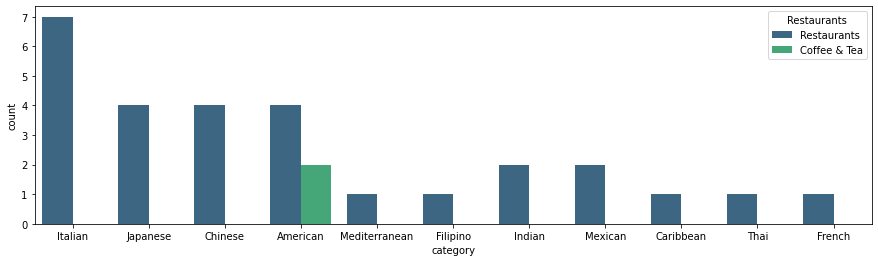

In [35]:
data = df_yelp_business_restaurants[['category', 'Restaurants']].dropna()[:30]
data
fig = plt.figure(figsize = (15,4))
sns.countplot(x = "category",hue="Restaurants", data = data,palette="viridis")
#sns.countplot(y="class", hue="who", data=titanic)
fig.savefig('distribution.jpg',dpi = 200)

From the above plot its clear that its only American style restaurants that also offers coffee with their food.

In [36]:


df_yelp_business_restaurants['category'] = df_yelp_business_restaurants['category']
df_yelp_business_restaurants[:50] 

#df_yelp_business_restaurants = df_yelp_business.loc[(df_yelp_business['category_1'] == 'Restaurants') | (df_yelp_business['category_2'] == 'Restaurants') | (df_yelp_business['category_3'] == 'Restaurants')]

,business_id,name,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,hours,Restaurants,category
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",Restaurants,NaN
20,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,Edmonton,AB,T5J 1B9,53.546045,-113.499169,4.0,40,0,"{'OutdoorSeating': 'False', 'Caters': 'True', ...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",Coffee & Tea,NaN
23,9OG5YkX1g2GReZM0AskizA,Romano's Macaroni Grill,Reno,NV,89502,39.476117,-119.789339,2.5,339,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",Restaurants,Italian
27,tMkwHmWFUEXrC9ZduonpTg,The Green Pheasant,Nashville,TN,37201,36.159886,-86.773197,4.0,161,0,"{'RestaurantsGoodForGroups': 'True', 'HappyHou...","{'Wednesday': '16:0-22:0', 'Thursday': '16:0-2...",Restaurants,Japanese
36,2xVsWBNFwZOxIOdd9Mwnww,Cheeseburger In Paradise,Exton,PA,19341,40.029962,-75.630607,2.5,20,0,"{'NoiseLevel': 'u'average'', 'HasTV': 'True', ...",None,Restaurants,NaN
41,ljxNT9p0y7YMPx0fcNBGig,Tony's Restaurant & 3rd Street Cafe,Alton,IL,62002,38.896563,-90.186203,3.0,94,1,"{'RestaurantsReservations': 'True', 'Restauran...","{'Monday': '0:0-0:0', 'Tuesday': '16:0-21:30',...",Restaurants,Italian
45,wghnIlMb_i5U46HMBGx9ig,China Dragon Restaurant,Tucson,AZ,85746,32.132305,-110.999985,3.0,23,0,"{'WiFi': ''no'', 'BusinessParking': '{'garage'...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",Restaurants,Chinese
47,lk9IwjZXqUMqqOhM774DtQ,Caviar & Bananas,Nashville,TN,37203,36.148371,-86.798895,3.5,159,0,"{'RestaurantsTakeOut': 'True', 'RestaurantsRes...","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...",Coffee & Tea,American
49,ABxoFuzZy5mqQ8C5FJJajQ,Core de Roma,Bala Cynwyd,PA,19004,40.028357,-75.238084,5.0,12,1,"{'RestaurantsTakeOut': 'None', 'RestaurantsDel...","{'Tuesday': '15:0-20:30', 'Wednesday': '15:0-2...",Restaurants,Italian
53,cVBxfMC4lp3DnocjYA3FHQ,Paws The Cat Cafe,Edmonton,AB,T5H 3B2,53.549633,-113.508780,5.0,20,0,"{'RestaurantsAttire': ''casual'', 'Restaurants...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-21:0', ...",Coffee & Tea,NaN


C:\Users\kulpr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


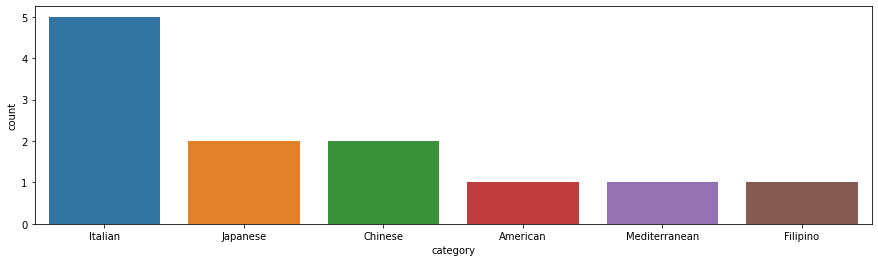

In [37]:
data = df_yelp_business_restaurants['category'][:20]
fig = plt.figure(figsize = (15,4))

sns.countplot(data)
fig.savefig('distribution.jpg',dpi = 200)

In [38]:
rest_attr = df_yelp_business_restaurants[["name","city","stars","review_count","is_open","Restaurants","category"]]
rest_attr.head()

,name,city,stars,review_count,is_open,Restaurants,category
3,St Honore Pastries,Philadelphia,4.0,80,1,Restaurants,NaN
20,Roast Coffeehouse and Wine Bar,Edmonton,4.0,40,0,Coffee & Tea,NaN
23,Romano's Macaroni Grill,Reno,2.5,339,1,Restaurants,Italian
27,The Green Pheasant,Nashville,4.0,161,0,Restaurants,Japanese
36,Cheeseburger In Paradise,Exton,2.5,20,0,Restaurants,NaN


In [39]:
df_yelp_business_restaurants.state.value_counts()

PA    4190
FL    2752
MO    1312
TN    1289
IN    1275
LA    1160
NJ    1060
AZ     895
AB     871
NV     550
ID     411
CA     408
DE     340
IL     326
MT       1
Name: state, dtype: int64

# Analysis of all the attributes: 

# Lets analyse the Resturant and Coffee Bussiness with their attributes



In [40]:
import json
data = df_yelp_business_restaurants["attributes"].values
from pandas.io.json import json_normalize
d = pd.json_normalize(data).fillna('0')  #.head().fillna(0)
d.head()

#A = json_normalize(df['columnA'].apply(only_dict).tolist()).add_prefix('columnA.')
#B = json_normalize(df['columnB'].apply(list_of_dicts).tolist()).add_prefix('columnB.pos.') 

,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BusinessParking,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,ByAppointmentOnly,WiFi,Alcohol,...,BYOB,DriveThru,BYOBCorkage,Corkage,Open24Hours,DietaryRestrictions,HairSpecializesIn,AgesAllowed,RestaurantsCounterService,AcceptsInsurance
0,False,False,False,"{'garage': False, 'street': True, 'validated':...",True,1,True,False,u'free',u'none',...,0,0,0,0,0,0,0,0,0,0
1,False,False,0,"{'garage': False, 'street': True, 'validated':...",0,2,True,0,u'free',u'beer_and_wine',...,0,0,0,0,0,0,0,0,0,0
2,True,True,True,"{'garage': False, 'street': False, 'validated'...",True,2,True,0,u'free','full_bar',...,0,0,0,0,0,0,0,0,0,0
3,None,False,True,"{'garage': True, 'street': False, 'validated':...",False,0,None,0,u'free',u'full_bar',...,0,0,0,0,0,0,0,0,0,0
4,False,True,True,"{'garage': False, 'street': False, 'validated'...",0,2,True,0,u'free',u'full_bar',...,0,0,0,0,0,0,0,0,0,0


In [41]:
d.columns

Index(['RestaurantsDelivery', 'OutdoorSeating', 'BusinessAcceptsCreditCards',
       'BusinessParking', 'BikeParking', 'RestaurantsPriceRange2',
       'RestaurantsTakeOut', 'ByAppointmentOnly', 'WiFi', 'Alcohol', 'Caters',
       'RestaurantsGoodForGroups', 'RestaurantsReservations', 'HasTV',
       'GoodForKids', 'NoiseLevel', 'RestaurantsAttire', 'Ambience',
       'GoodForMeal', 'RestaurantsTableService', 'HappyHour', 'DogsAllowed',
       'BusinessAcceptsBitcoin', 'WheelchairAccessible', 'BestNights',
       'CoatCheck', 'Music', 'Smoking', 'GoodForDancing', 'BYOB', 'DriveThru',
       'BYOBCorkage', 'Corkage', 'Open24Hours', 'DietaryRestrictions',
       'HairSpecializesIn', 'AgesAllowed', 'RestaurantsCounterService',
       'AcceptsInsurance'],
      dtype='object')

In [42]:
import ast
from pandas.io.json import json_normalize

def only_dict(d):
    '''
    Convert json string representation of dictionary to a python dict
    '''
    return ast.literal_eval(d)

def list_of_dicts(ld):
    '''
    Create a mapping of the tuples formed after 
    converting json strings of list to a python list   
    '''
    return dict([(list(d.values())[1], list(d.values())[0]) for d in ast.literal_eval(ld)])

A = json_normalize(d['Ambience'].apply(only_dict).tolist())
B = json_normalize(d['BusinessParking'].apply(only_dict).tolist())
#B = json_normalize(d['columnB'].apply(list_of_dicts).tolist()).add_prefix('columnB.pos.')
B

C:\Users\kulpr\AppData\Local\Temp\ipykernel_1236\2403295531.py:17: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  A = json_normalize(d['Ambience'].apply(only_dict).tolist())
C:\Users\kulpr\AppData\Local\Temp\ipykernel_1236\2403295531.py:18: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  B = json_normalize(d['BusinessParking'].apply(only_dict).tolist())


,garage,street,validated,lot,valet
0,False,True,False,False,False
1,False,True,False,True,False
2,False,False,False,True,False
3,True,False,True,False,True
4,False,False,False,True,False
...,...,...,...,...,...
16835,False,False,False,False,False
16836,False,False,False,False,False
16837,False,False,False,True,False
16838,None,True,None,False,False


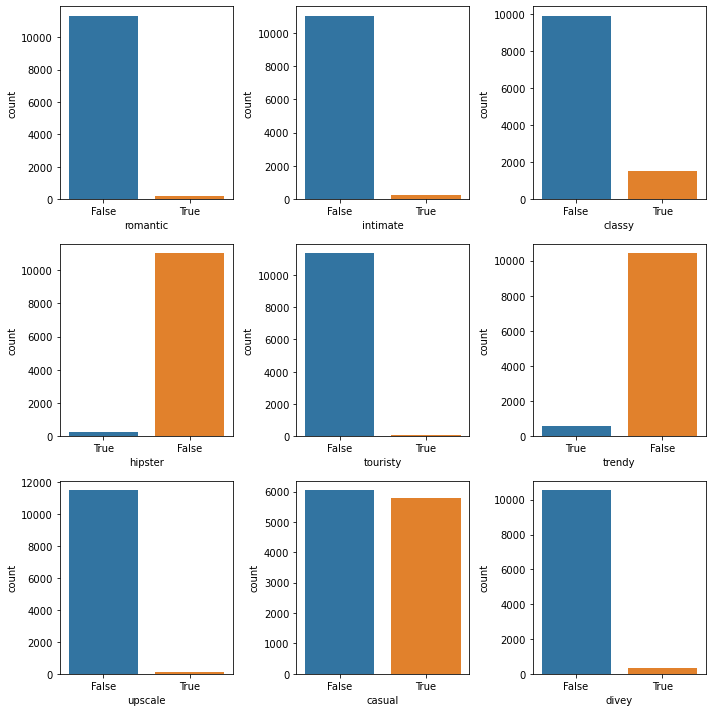

In [43]:

fig, axes = plt.subplots(3, 3, figsize = (10,10))

sns.countplot(x = A["romantic"] , ax = axes[0,0])

sns.countplot(x = A["intimate"], ax = axes[0,1])

sns.countplot(x = A["classy"], ax = axes[0,2])


sns.countplot(x = A["hipster"], ax = axes[1,0])

sns.countplot(x = A["touristy"], ax = axes[1,1])
sns.countplot(x = A["trendy"], ax = axes[1,2])

sns.countplot(x = A["upscale"], ax = axes[2,0])

sns.countplot(x = A["casual"], ax = axes[2,1])
sns.countplot(x = A["divey"], ax = axes[2,2])
#axes[0,1] = sns.countplot(attributes_r["alcohol"])



plt.tight_layout()
fig.savefig('distribution.jpg',dpi = 200)

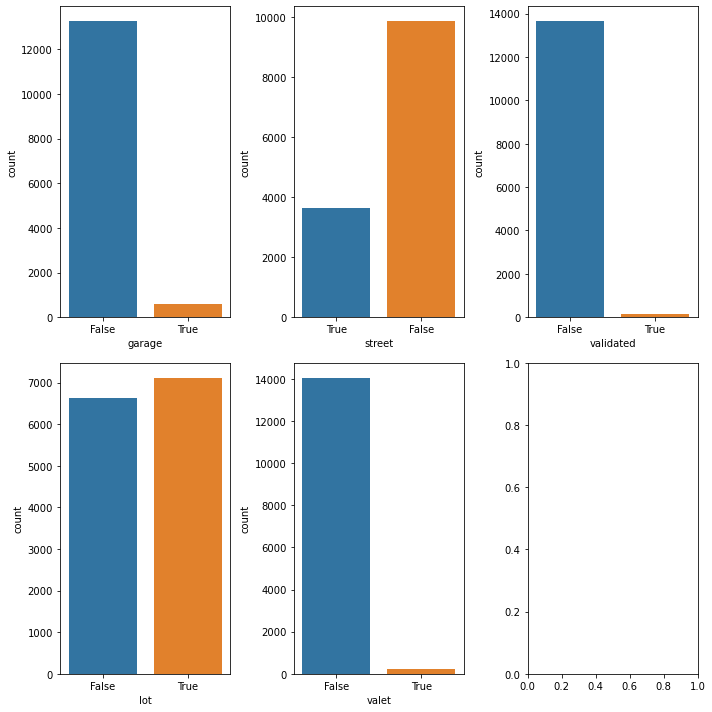

In [44]:
fig, axes = plt.subplots(2, 3, figsize = (10,10))

sns.countplot(x = B["garage"] , ax = axes[0,0])

sns.countplot(x = B["street"], ax = axes[0,1])

sns.countplot(x =B["validated"], ax = axes[0,2])


sns.countplot(x = B["lot"], ax = axes[1,0])

sns.countplot(x = B["valet"], ax = axes[1,1])

#axes[0,1] = sns.countplot(attributes_r["alcohol"])



plt.tight_layout()
fig.savefig('distribution.jpg',dpi = 200)

C:\Users\kulpr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GoodForKids', ylabel='count'>

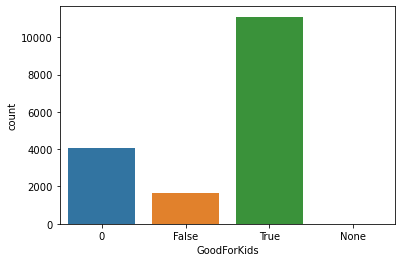

In [45]:
sns.countplot(d['GoodForKids'])

In [46]:
df = pd.concat([df_yelp_business_restaurants[['name','Restaurants','review_count','stars']], A ], axis = 1)
df.head()

,name,Restaurants,review_count,stars,romantic,intimate,classy,hipster,touristy,trendy,upscale,casual,divey
3,St Honore Pastries,Restaurants,80.0,4.0,False,False,True,False,False,False,False,False,False
20,Roast Coffeehouse and Wine Bar,Coffee & Tea,40.0,4.0,False,False,False,False,None,False,False,True,None
23,Romano's Macaroni Grill,Restaurants,339.0,2.5,False,False,False,False,False,False,False,False,False
27,The Green Pheasant,Restaurants,161.0,4.0,False,False,False,False,False,False,False,False,False
36,Cheeseburger In Paradise,Restaurants,20.0,2.5,False,False,False,False,False,False,False,False,False


Analyising resturants that are casual and have good Stars values.

<AxesSubplot:xlabel='name', ylabel='stars'>

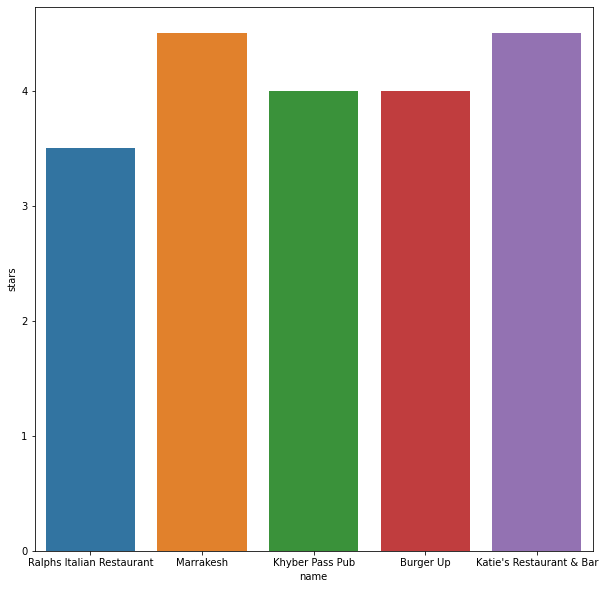

In [47]:
fig = plt.figure(figsize = (10,10))
data = df.groupby(['review_count','stars']).sum()
data.reset_index()
#data = data['romantic']
d = data[data['casual'] == True].reset_index()
data = d[d['stars']>3].tail()

sns.barplot(x = 'name', y = 'stars', data = data)
fig.savefig('distribution.jpg',dpi = 200)

In [48]:
import json
data = df_yelp_business_restaurants["attributes"].values
from pandas.io.json import json_normalize
d = pd.json_normalize(data).fillna('0')  #.head().fillna(0)
d.head()

,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BusinessParking,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,ByAppointmentOnly,WiFi,Alcohol,...,BYOB,DriveThru,BYOBCorkage,Corkage,Open24Hours,DietaryRestrictions,HairSpecializesIn,AgesAllowed,RestaurantsCounterService,AcceptsInsurance
0,False,False,False,"{'garage': False, 'street': True, 'validated':...",True,1,True,False,u'free',u'none',...,0,0,0,0,0,0,0,0,0,0
1,False,False,0,"{'garage': False, 'street': True, 'validated':...",0,2,True,0,u'free',u'beer_and_wine',...,0,0,0,0,0,0,0,0,0,0
2,True,True,True,"{'garage': False, 'street': False, 'validated'...",True,2,True,0,u'free','full_bar',...,0,0,0,0,0,0,0,0,0,0
3,None,False,True,"{'garage': True, 'street': False, 'validated':...",False,0,None,0,u'free',u'full_bar',...,0,0,0,0,0,0,0,0,0,0
4,False,True,True,"{'garage': False, 'street': False, 'validated'...",0,2,True,0,u'free',u'full_bar',...,0,0,0,0,0,0,0,0,0,0


In [49]:
attributes_r = d[['RestaurantsPriceRange2','RestaurantsTakeOut','DriveThru',
                  'OutdoorSeating','BusinessAcceptsCreditCards','WiFi','Alcohol']]
attributes_r = attributes_r.rename(columns={'RestaurantsPriceRange2' : 'Price', 'RestaurantsTakeOut':'Take-Out',
                                            'DriveThru':'Drive-Thru', 'OutdoorSeating':'Outdoor', 
                                            'BusinessAcceptsCreditCards' : 'CreditCards', 'WiFi' : 'WiFi', 
                                            'Alcohol' : 'Alcohol'})
attributes_r.head()


,Price,Take-Out,Drive-Thru,Outdoor,CreditCards,WiFi,Alcohol
0,1,True,0,False,False,u'free',u'none'
1,2,True,0,False,0,u'free',u'beer_and_wine'
2,2,True,0,True,True,u'free','full_bar'
3,0,None,0,False,True,u'free',u'full_bar'
4,2,True,0,True,True,u'free',u'full_bar'


In [50]:
attributes_r['alcohol'] = pd.Series()  # adding a new column 'alcohol' to attributes df

attributes_r.loc[attributes_r.Alcohol.str.contains("u'none'", na=False),'alcohol'] = "No"
attributes_r.loc[attributes_r.Alcohol.str.contains("u'full_bar'", na=False),'alcohol'] = "Yes"
attributes_r.loc[attributes_r.Alcohol.str.contains("'none'", na=False),'alcohol'] = "No"
attributes_r.loc[attributes_r.Alcohol.str.contains("u'beer_and_wine'", na=False),'alcohol'] = "Yes"
attributes_r.loc[attributes_r.Alcohol.str.contains("'full_bar'", na=False),'alcohol'] = "Yes"
attributes_r.loc[attributes_r.Alcohol.str.contains("'beer_and_wine'", na=False),'alcohol'] = "Yes"
attributes_r.loc[attributes_r.Alcohol.str.contains("None", na=False),'alcohol'] = "No"

attributes_r = attributes_r.drop('Alcohol', axis = 1)


attributes_r['wifi'] = pd.Series() # adding a new column 'wifi' to attributes df

attributes_r.loc[attributes_r.WiFi.str.contains("u'no'", na=False),'wifi'] = "No"
attributes_r.loc[attributes_r.WiFi.str.contains("'no'", na=False),'wifi'] = "No"
attributes_r.loc[attributes_r.WiFi.str.contains("u'free'", na=False),'wifi'] = "Free"
attributes_r.loc[attributes_r.WiFi.str.contains("'free'", na=False),'wifi'] = "Free"
attributes_r.loc[attributes_r.WiFi.str.contains("u'paid'", na=False),'wifi'] = "Paid"
attributes_r.loc[attributes_r.WiFi.str.contains("'paid'", na=False),'wifi'] = "Paid"
attributes_r.loc[attributes_r.WiFi.str.contains("None", na=False),'wifi'] = "No"
attributes_r = attributes_r.drop('WiFi', axis = 1)


attributes_r.loc[attributes_r.CreditCards.str.contains("None", na=False),'CreditCards'] = "False"
attributes_r.loc[attributes_r.Outdoor.str.contains("None", na=False),'Outdoor'] = "False"




#df[df['position'].str.contains('Guard', na=False)]

C:\Users\kulpr\AppData\Local\Temp\ipykernel_1236\2148460878.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  attributes_r['alcohol'] = pd.Series()  # adding a new column 'alcohol' to attributes df
C:\Users\kulpr\AppData\Local\Temp\ipykernel_1236\2148460878.py:14: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  attributes_r['wifi'] = pd.Series() # adding a new column 'wifi' to attributes df


In [51]:
attributes_r.head()

,Price,Take-Out,Drive-Thru,Outdoor,CreditCards,alcohol,wifi
0,1,True,0,False,False,No,Free
1,2,True,0,False,0,Yes,Free
2,2,True,0,True,True,Yes,Free
3,0,None,0,False,True,Yes,Free
4,2,True,0,True,True,Yes,Free


In [52]:
rest_attr.head()

,name,city,stars,review_count,is_open,Restaurants,category
3,St Honore Pastries,Philadelphia,4.0,80,1,Restaurants,NaN
20,Roast Coffeehouse and Wine Bar,Edmonton,4.0,40,0,Coffee & Tea,NaN
23,Romano's Macaroni Grill,Reno,2.5,339,1,Restaurants,Italian
27,The Green Pheasant,Nashville,4.0,161,0,Restaurants,Japanese
36,Cheeseburger In Paradise,Exton,2.5,20,0,Restaurants,NaN


In [53]:
len(rest_attr)

16840

In [54]:
mask = (attributes_r["CreditCards"] == '0') 
mask2 = (attributes_r["Outdoor"] == '0') 
mask3 = (attributes_r["Take-Out"] == '0')
mask4 = (attributes_r["Drive-Thru"] == '0')
attributes_re = attributes_r[~mask].dropna()  #filter out the '0' values
attributes_re = attributes_r[~mask2]
attributes_re = attributes_r[~mask3]
attributes_re = attributes_r[~mask4]

# We will plot all attributes of the resturants like Credit Card acceptance, WiFi, Price, Outdoor seating:

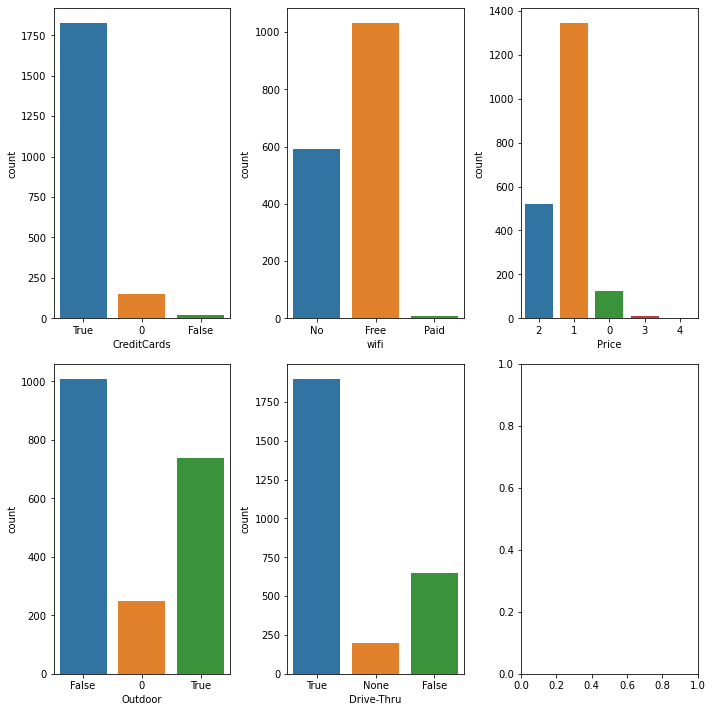

In [55]:


fig, axes = plt.subplots(2, 3, figsize = (10,10))

sns.countplot(x = attributes_re["CreditCards"] , ax = axes[0,0])

sns.countplot(x = attributes_re["wifi"], ax = axes[0,1])

sns.countplot(x = attributes_re["Price"], ax = axes[0,2])


sns.countplot(x = attributes_re["Outdoor"], ax = axes[1,0])

sns.countplot(x = attributes_re["Take-Out"], ax = axes[1,1])
sns.countplot(x = attributes_re["Drive-Thru"], ax = axes[1,1])


#axes[0,1] = sns.countplot(attributes_r["alcohol"])



plt.tight_layout()

fig.savefig('distribution.jpg',dpi = 200)

In [56]:
df_restaurants = df_yelp_business_restaurants.drop(['attributes', 'hours'], axis = 1)
df_restaurants.head(1)

,business_id,name,city,state,postal_code,latitude,longitude,stars,review_count,is_open,Restaurants,category
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,Restaurants,NaN


In [57]:
# Remove duplicate values
remove_duplicates=df_restaurants.drop_duplicates()


# Drop null values from Restaurant Name, City,Rating , Review Count,Price coloumns  and store cleaned data

df_restaurants=remove_duplicates.dropna(subset=['name','city','stars','review_count'])
df_restaurants.head()

,business_id,name,city,state,postal_code,latitude,longitude,stars,review_count,is_open,Restaurants,category
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,Restaurants,NaN
20,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,Edmonton,AB,T5J 1B9,53.546045,-113.499169,4.0,40,0,Coffee & Tea,NaN
23,9OG5YkX1g2GReZM0AskizA,Romano's Macaroni Grill,Reno,NV,89502,39.476117,-119.789339,2.5,339,1,Restaurants,Italian
27,tMkwHmWFUEXrC9ZduonpTg,The Green Pheasant,Nashville,TN,37201,36.159886,-86.773197,4.0,161,0,Restaurants,Japanese
36,2xVsWBNFwZOxIOdd9Mwnww,Cheeseburger In Paradise,Exton,PA,19341,40.029962,-75.630607,2.5,20,0,Restaurants,NaN


In [58]:
df_restaurants['Price'] = attributes_r.Price
df_restaurants.head()

,business_id,name,city,state,postal_code,latitude,longitude,stars,review_count,is_open,Restaurants,category,Price
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,Restaurants,NaN,0
20,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,Edmonton,AB,T5J 1B9,53.546045,-113.499169,4.0,40,0,Coffee & Tea,NaN,2
23,9OG5YkX1g2GReZM0AskizA,Romano's Macaroni Grill,Reno,NV,89502,39.476117,-119.789339,2.5,339,1,Restaurants,Italian,1
27,tMkwHmWFUEXrC9ZduonpTg,The Green Pheasant,Nashville,TN,37201,36.159886,-86.773197,4.0,161,0,Restaurants,Japanese,2
36,2xVsWBNFwZOxIOdd9Mwnww,Cheeseburger In Paradise,Exton,PA,19341,40.029962,-75.630607,2.5,20,0,Restaurants,NaN,2


Text(0.5, 1.0, 'Top Cites with Resturants with Higest Review Counts')

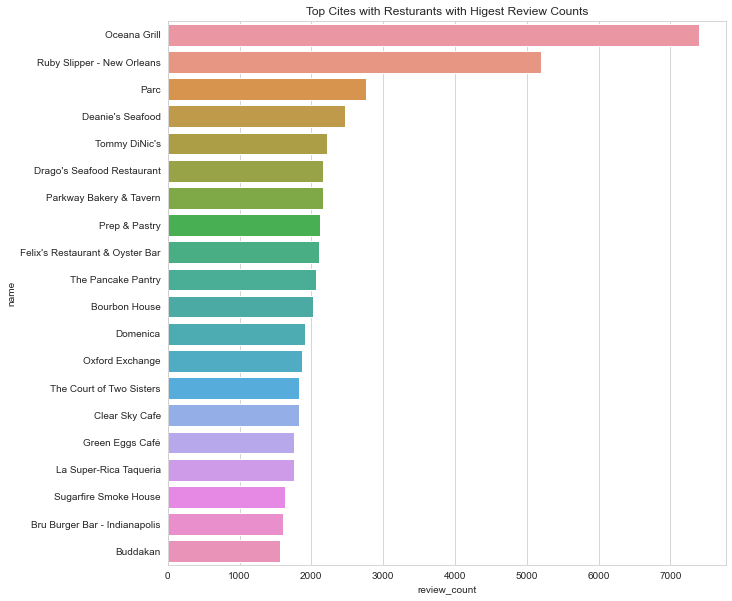

In [59]:
sns.set_style("whitegrid")
fig = plt.figure(figsize = (10,10))
city_review = df_restaurants[['name','review_count']]
Average_city = city_review.groupby(['name']).mean()
best_city = Average_city[Average_city['review_count']>500].sort_values('review_count',ascending = False)
best_city = best_city.reset_index()
sns.barplot(x = "review_count", y = "name" , data = best_city[:20])
plt.title("Top Cites with Resturants with Higest Review Counts")




fig.savefig('distribution.jpg',dpi = 200)

Text(0.5, 1.0, 'Top Cites with Resturants with Higest Review Counts')

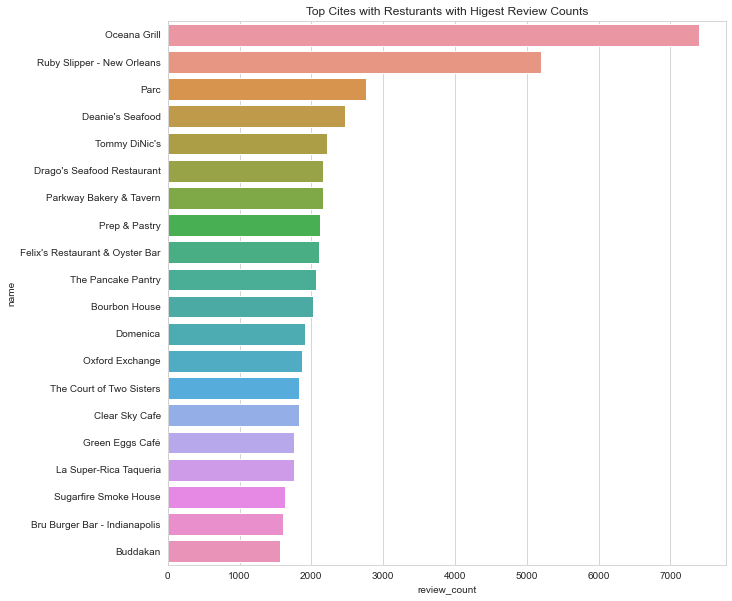

In [60]:
sns.set_style("whitegrid")
fig = plt.figure(figsize = (10,10))
city_review = df_restaurants[['name','review_count']]
Average_city = city_review.groupby(['name']).mean()
best_city = Average_city[Average_city['review_count']>500].sort_values('review_count',ascending = False)
best_city = best_city.reset_index()
sns.barplot(x = "review_count", y = "name" , data = best_city[:20])
plt.title("Top Cites with Resturants with Higest Review Counts")


Text(0.5, 1.0, 'Top States with Resturants with Higest Review Counts')

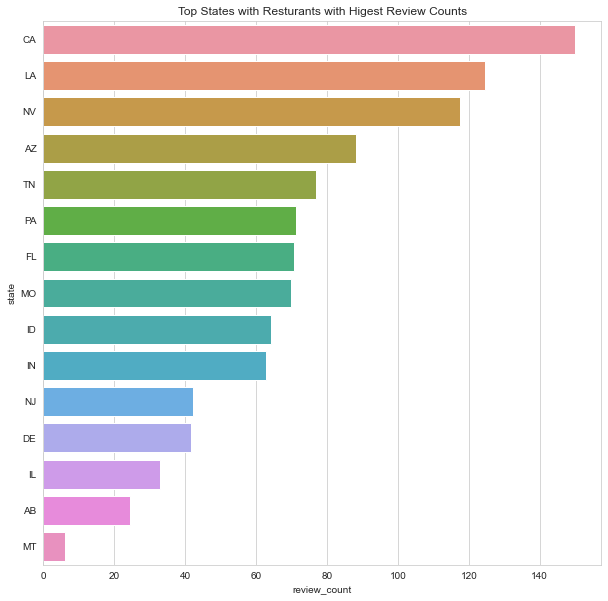

In [61]:
sns.set_style("whitegrid")
fig = plt.figure(figsize = (10,10))
state_review = df_restaurants[['name','city','state','stars','review_count',"latitude","longitude"]]
Average_state = state_review.groupby(['state']).mean()
best_state = (Average_state["review_count"]).sort_values(ascending = False)
best_state = best_state.reset_index()
sns.barplot(x = "review_count", y = "state" , data = best_state[:20])
plt.title("Top States with Resturants with Higest Review Counts")
fig.savefig('distribution.jpg',dpi = 200)

In [62]:
rest_clean = df_restaurants.dropna()
rest_clean = rest_clean.sort_values(by = ['review_count','stars','Price'], ascending = False)
Restaurant_total_number = rest_clean.Restaurants.value_counts()[0]

The restaurants that are open tends to get more reviews

<AxesSubplot:xlabel='is_open', ylabel='review_count'>

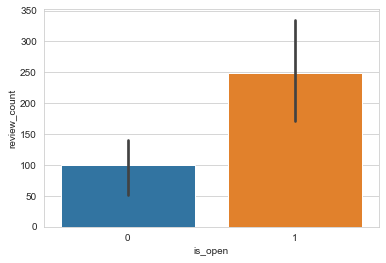

In [63]:
sns.set_style("whitegrid")
sns.barplot(x="is_open",y="review_count",data=rest_clean[:200],estimator=np.std)
fig.savefig('distribution.jpg',dpi = 200)

Text(0.5, 1.0, 'Distribution of Pricing vs Review Counts')

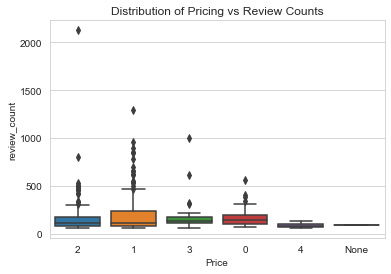

In [64]:
sns.set_style("whitegrid")

sns.boxplot(x="Price",y="review_count",data=rest_clean[:400])
plt.title("Distribution of Pricing vs Review Counts")
fig.savefig('distribution.jpg',dpi = 200)

<AxesSubplot:ylabel='Frequency'>

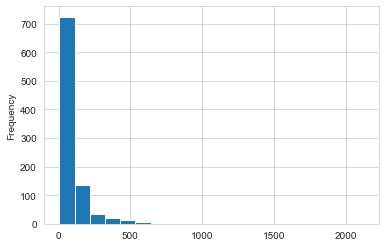

In [65]:
sns.set_style("whitegrid")
rest_clean["review_count"].plot.hist(bins=20)

fig.savefig('distribution.jpg',dpi = 200)

<AxesSubplot:title={'center':'The number of Resturants in each Star-Rating'}, xlabel='Star-Rating', ylabel='Frequency'>

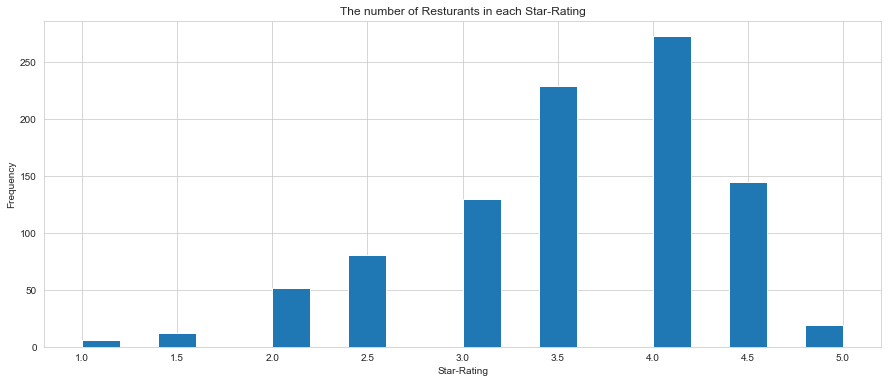

In [66]:
sns.set_style("whitegrid")

props={
     
    "title":"The number of Resturants in each Star-Rating",
    "xlabel":"Star-Rating",
    "ylabel":"Number of Resturants",
     
}



fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,1,1)
ax.set(**props)

rest_clean["stars"].plot.hist(bins=20)

fig.savefig('distribution.jpg',dpi = 200)


This pair plot illustrates that only the resturants that are open gets more review counts and stars.

In [67]:
rest_clean.Price.unique()

array(['2', '1', '3', '0', '4', 'None'], dtype=object)

In [68]:
rest_clean = df_restaurants.dropna()
rest_clean = rest_clean.sort_values(by = ['review_count','stars','Price'], ascending = False)
Restaurant_total_number = rest_clean.Restaurants.value_counts()[0]
rest_pair_plot = rest_clean[['review_count','stars','is_open','Price']]
mask = rest_pair_plot['Price'] == 'None'
rest_pair_plot = rest_pair_plot[~mask]
#mask0 = (df['condition'] == 1)

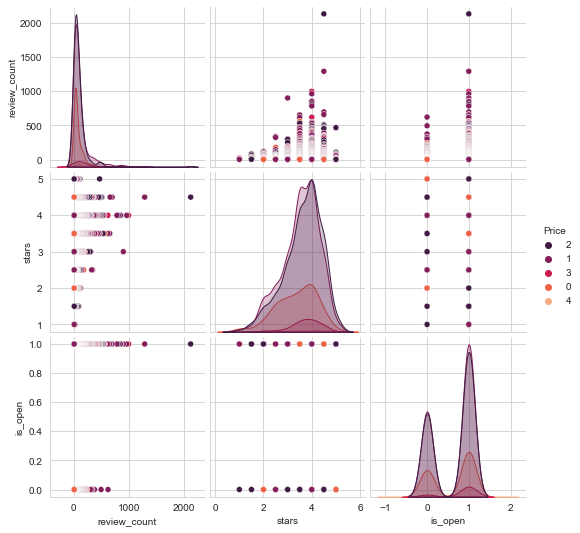

In [69]:
sns.set_palette("dark")
sns.pairplot(rest_pair_plot,hue = 'Price',palette="rocket")
fig.savefig('distribution.jpg',dpi = 200)

In [70]:
resturants_att = df_restaurants.sort_values(by = ['review_count','stars'], ascending = False)
resturants_att[["name", "Price"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16840 entries, 112552 to 149995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    16840 non-null  object
 1   Price   1860 non-null   object
dtypes: object(2)
memory usage: 394.7+ KB


In [71]:
# The percentage of Restaurants pricing under 10 $ (labled as "$" in the dataset)

restaurant_pricing_under_20= rest_clean.loc[rest_clean["Price"] == '1']

restaurant_count_pricing_under_20 = restaurant_pricing_under_20["Restaurants"].count()

percent_restaurant_pricing_under_20= (restaurant_count_pricing_under_20/Restaurant_total_number) * 100

percent_restaurant_pricing_under_20

41.890440386680986

In [72]:
restaurant_pricing_under_50 = rest_clean.loc[rest_clean["Price"] == '2']
restaurant_count_pricing_under_50 = restaurant_pricing_under_50["Restaurants"].count()

percent_restaurant_pricing_under_50= (restaurant_count_pricing_under_50/Restaurant_total_number) * 100

percent_restaurant_pricing_under_50

40.6015037593985

In [73]:
restaurant_pricing_under_80 = rest_clean.loc[rest_clean["Price"] == '3']
restaurant_count_pricing_under_80 = restaurant_pricing_under_80["Restaurants"].count()

percent_restaurant_pricing_under_80= (restaurant_count_pricing_under_80/Restaurant_total_number) * 100

percent_restaurant_pricing_under_80


3.007518796992481

In [74]:
restaurant_pricing_above_80 = rest_clean.loc[rest_clean["Price"] == '4']
restaurant_count_above_80 = restaurant_pricing_above_80["Restaurants"].count()

percent_restaurant_pricing_above_80= (restaurant_count_above_80 /Restaurant_total_number) * 100

percent_restaurant_pricing_above_80

0.5370569280343717

In [75]:
rest_clean["Price"].value_counts()

1       390
2       378
0       145
3        28
4         5
None      1
Name: Price, dtype: int64

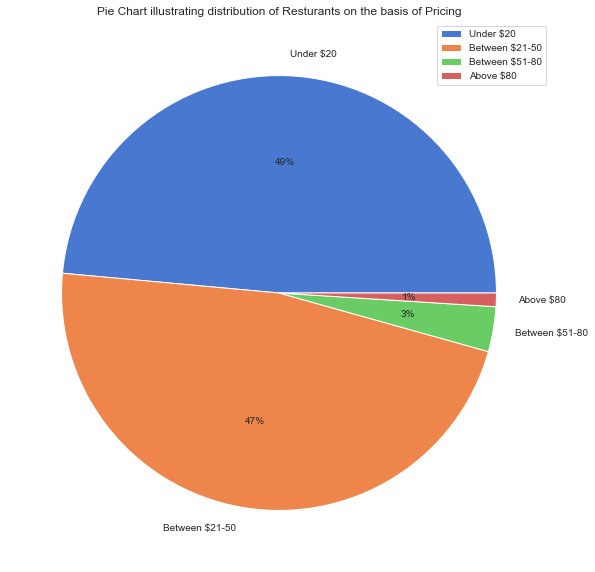

In [76]:
fig = plt.figure(figsize = (10,10))

#define data
data = [45.811051693404636, 44.44444444444444, 3.1491384432560903, 0.9506833036244802]
labels = labels = ["Under $20","Between $21-50","Between $51-80","Above $80"]

#define Seaborn color palette to use
colors = sns.color_palette('muted')
#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Pie Chart illustrating distribution of Resturants on the basis of Pricing")
plt.legend()
plt.show()
fig.savefig('distribution.jpg',dpi = 200)

C:\Users\kulpr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


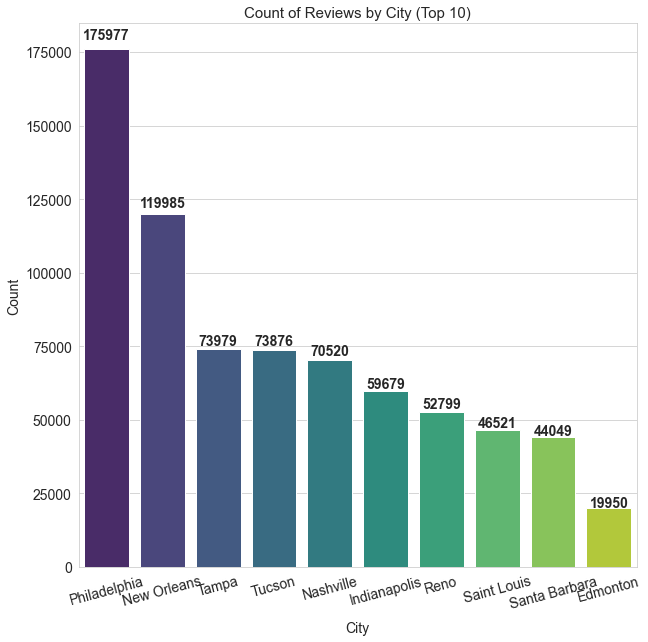

In [77]:
fig = plt.figure(figsize = (10,10))
city_review = df_restaurants[['name','city','state','stars','review_count',"latitude","longitude"]]
grouped = city_review.groupby('city')['review_count'].sum().sort_values(ascending = False)[:10]
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("viridis", len(grouped)) )
plt.xlabel('City', labelpad=10, fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Reviews by City (Top 10)', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

fig.savefig('distribution.jpg',dpi = 200)

Lets load the "Data Review Table" and analyse the user review :

In [78]:

import ndjson
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [79]:
b_pandas=[]
rd_types={"stars": np.float16,
          "useful": np.int32,
           "funny": np.int32,
           "cool": np.int32,
         }


f= open("yelp_academic_dataset_review.json",encoding='utf-8') 
reader=pd.read_json(f,orient="records",lines=True,dtype=rd_types,chunksize=1000)

In [80]:
reader #Iterator: so that I get an iterator that yields a DataFrame corresponding to chunksize reviews (rows) per iteration.

In [81]:
#to read data from iterator:

for chunk in reader:
    reduced_chunk=chunk.drop(columns=['review_id']).query("`date`>'2017-12-01'")
    b_pandas.append(reduced_chunk)
df_yelp_review=pd.concat(b_pandas,ignore_index=True)

In [82]:
df_yelp_review.stars.value_counts()

5.0    1595011
1.0     554639
4.0     476098
3.0     240028
2.0     214803
Name: stars, dtype: int64

Creating of a new column:
The new column will be - "length". This column will hold the data of the word length of the review.

In [83]:
df_yelp_review['text_length'] = df_yelp_review['text'].apply(len)

df_yelp_review.head()


,user_id,business_id,stars,useful,funny,cool,text,date,text_length
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,513
1,RreNy--tOmXMl1en0wiBOg,cPepkJeRMtHapc_b2Oe_dw,4.0,1,0,1,I was really between 3 and 4 stars for this on...,2018-07-17 03:30:07,1555
2,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5.0,0,0,0,My boyfriend and I tried this deli for the fir...,2018-08-23 21:39:38,393
3,iYY5Ii1LGpZCpXFkHlMefw,Zx7n8mdt8OzLRXVzolXNhQ,5.0,0,0,0,Amazing biscuits and (fill in the blank). Grea...,2018-04-27 23:03:21,101
4,S7bjj-L07JuRr-tpX1UZLw,I6L0Zxi5Ww0zEWSAVgngeQ,4.0,0,0,0,The cafe was extremely cute. We came at 8am an...,2018-07-07 20:50:12,248


df_yelp_review dataset has business id but no businesss name so lets map in business name from df_yelp_business_restaurants.
So I take the df_yelp_review business_id and match with df_yelp_business_restaurants business id.
And take the business name from df_yelp_business_restaurants and create a new column in df_yelp_review that holds business name

In [84]:
df_yelp_review.describe()

,stars,useful,funny,cool,text_length
count,3080579.0,3.080579e+06,3.080579e+06,3.080579e+06,3.080579e+06
mean,NaN,9.563254e-01,2.317600e-01,4.819990e-01,5.212161e+02
std,0.0,2.966855e+00,1.385441e+00,2.393029e+00,4.867448e+02
min,1.0,-1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,3.0,0.000000e+00,0.000000e+00,0.000000e+00,2.130000e+02
50%,5.0,0.000000e+00,0.000000e+00,0.000000e+00,3.720000e+02
75%,5.0,1.000000e+00,0.000000e+00,0.000000e+00,6.550000e+02
max,5.0,5.390000e+02,2.540000e+02,3.040000e+02,5.000000e+03


In [85]:
df_yelp_review['name'] = df_yelp_review['business_id'].map(df_yelp_business_restaurants.set_index("business_id")["name"])
top_resturants = df_yelp_review.name.value_counts().index[:20].to_list()
top_resturants

["McDonald's",
 'Starbucks',
 'Oceana Grill',
 'Ruby Slipper - New Orleans',
 'Taco Bell',
 "Felix's Restaurant & Oyster Bar",
 "Martin's Bar-B-Que Joint",
 "Drago's Seafood Restaurant",
 'Chipotle Mexican Grill',
 'Outback Steakhouse',
 "Dunkin'",
 "Wendy's",
 'First Watch',
 'Green Eggs Café',
 "Peg's Glorified Ham N Eggs",
 'Burger King',
 'Culinary Dropout',
 'Chubby Cattle',
 'Chick-fil-A',
 'Salt + Smoke']

In [86]:
df_yelp_review['Restaurants'] = df_yelp_review['business_id'].map(df_yelp_business_restaurants.set_index("business_id")["Restaurants"])
top_resturants = df_yelp_review.name.value_counts().index[:20].to_list()
top_resturants

["McDonald's",
 'Starbucks',
 'Oceana Grill',
 'Ruby Slipper - New Orleans',
 'Taco Bell',
 "Felix's Restaurant & Oyster Bar",
 "Martin's Bar-B-Que Joint",
 "Drago's Seafood Restaurant",
 'Chipotle Mexican Grill',
 'Outback Steakhouse',
 "Dunkin'",
 "Wendy's",
 'First Watch',
 'Green Eggs Café',
 "Peg's Glorified Ham N Eggs",
 'Burger King',
 'Culinary Dropout',
 'Chubby Cattle',
 'Chick-fil-A',
 'Salt + Smoke']

Text(0, 0.5, 'Resturant Name')

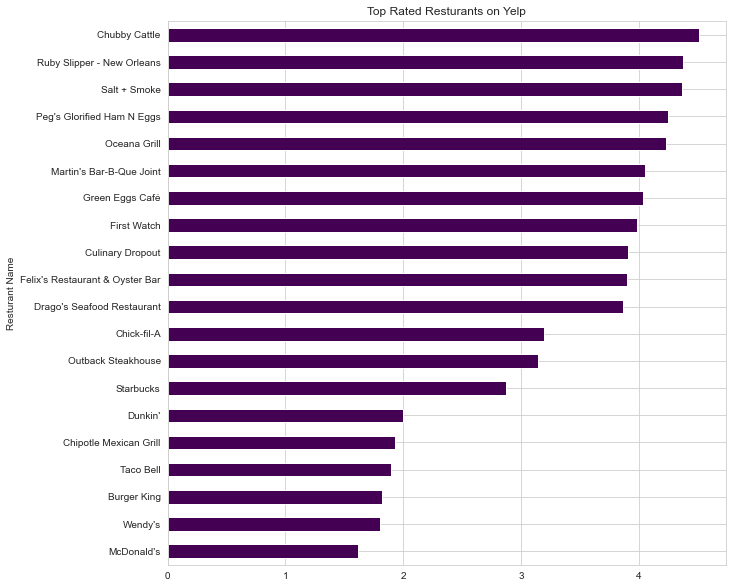

In [87]:
sns.color_palette("tab10")
df_top_reviews = df_yelp_review.loc[df_yelp_review['name'].isin(top_resturants)]
data = df_top_reviews.groupby(df_top_reviews.name)['stars'].mean().sort_values(ascending = True).plot(kind = 'barh',figsize = (10,10),cmap = 'viridis')
plt.title('Top Rated Resturants on Yelp')
plt.ylabel('Resturant Name')
fig.savefig('distribution.jpg',dpi = 200)


Preprocessing the data

Now it is time to preprocess the reviews because all these modifications will directly affect the classifier’s performance. As we are going to use words as features so we can use some text formatting techniques which will help us in feature extraction including removing punctuation marks/digits ,and also stop-words. In addition, the implementation of lemmatization words using NLTK can be workable to maximize the performance. Tokenization is the last step to break reviews up into words and other meaningful tokens.


In [88]:
import nltk
import string
import re
from textblob import TextBlob
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
all_stopwords = stop_words  #.words('english')
#List of Stopwords to be removed
#(["aren't","couldn't", "didn't", "any","didn't","doesn't","during",'further',
 #"hadn't","hasn't", "haven't","isn't","mightn't","mustn't","needn't",'not','no',"shan't","shouldn't","wasn't","weren't",
#"wouldn't", "won't","won't" ])
#all_stopwords.remove('not')
not_stopwords = {"aren't","couldn't", "didn't", "any","didn't","doesn't","during",'further',
 "hadn't","hasn't", "haven't","isn't","mightn't","mustn't","needn't",'not','no',"shan't","shouldn't","wasn't","weren't",
"wouldn't", "won't","won't" }
final_stop_words = set([word for word in all_stopwords if word not in not_stopwords])


In [89]:

def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())                  # get rid of noise
    x = [w for w in x.split() if w not in set(final_stop_words)]  # remove stopwords
    return ' '.join(x) # then join the text again
# let's find out which stopwords need to remove. We'll use english stopwords.

i = final_stop_words
# punctuations to remove
j = list(string.punctuation)
# finally let's combine all of these
stopwords = set(i).union(j)
df_top_reviews['text_clear'] = df_top_reviews["text"].apply(preprocess)

def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity


def my_tokenizer(x):
    listofwords = x.strip().split()
    # to remove any space from beginning and the end of text
    listof_words = []
    if not word in final_stop_words:
            lemm_word = WordNetLemmatizer().lemmatize(word)
            # remove the stop words
            for punctuation_mark in string.punctuation:
                word = word.replace(punctuation_mark, '').lower()
            if len(word)>0:
                listof_words.append(word)
    return(listof_words)

C:\Users\kulpr\AppData\Local\Temp\ipykernel_1236\1344528401.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_reviews['text_clear'] = df_top_reviews["text"].apply(preprocess)


Now we take the name column and count mean of 'useful','funny', 'cool' of each unique business name (I am using pandas groupby function for this. If you don't know what pandas groupby function does, please search on Google)
then sort values in ascending order 
then plot the graph

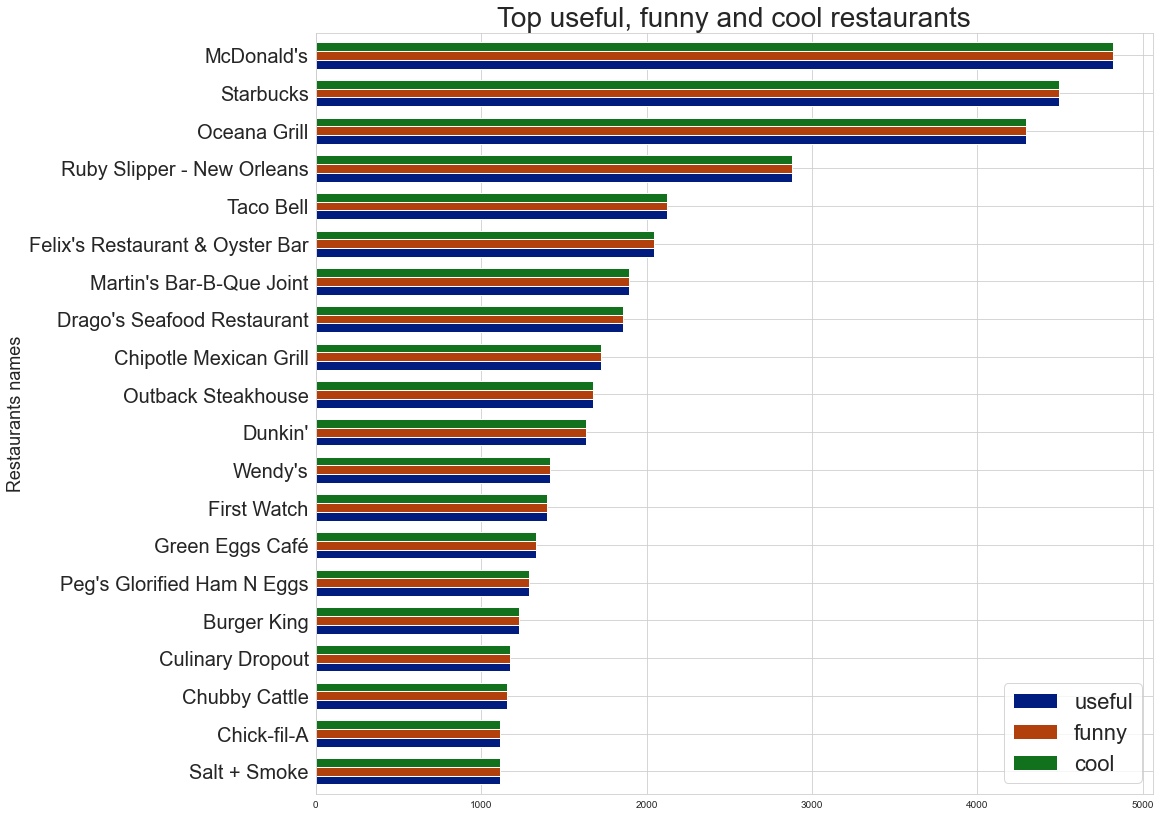

In [90]:
df_top_reviews.groupby(df_top_reviews.name)[['useful','funny', 'cool']].count().sort_values('useful',ascending=True).plot(kind='barh', figsize=(15, 14),width=0.7)
# set y ticks font size to 18 for easy readable purposes.
plt.yticks(fontsize=18)
# set the title of the graph
plt.title('Top useful, funny and cool restaurants',fontsize=28)
# set y label of the graph and change fontsize to 18 for readablity purposes.
plt.ylabel('Restaurants names', fontsize=18)
# set the y ticks
plt.yticks(fontsize=20)
plt.legend(fontsize=22)
# finally show the plot
plt.show()

fig.savefig('distribution.jpg',dpi = 200)

<AxesSubplot:>

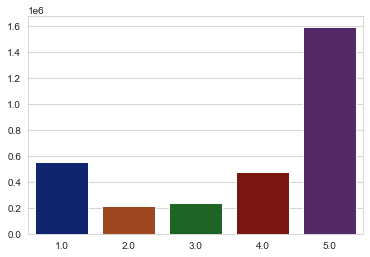

In [91]:
data = df_yelp_review['stars'].value_counts()
sns.barplot(x = data.index, y = data.values)

This bar graph gives distribution of stars amoung all the reviews.

Let us now visualize the if there is any correlation between stars and the length of the review.

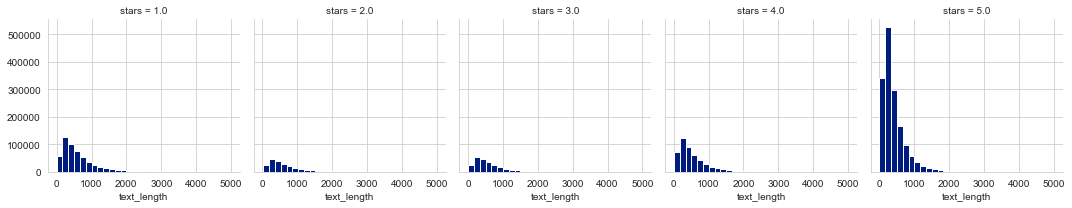

In [92]:
g =sns.FacetGrid(data = df_yelp_review, col = 'stars')
g.map(plt.hist, 'text_length', bins = 30)

In [93]:
stars = df_yelp_review.groupby("stars").mean()
stars

,useful,funny,cool,text_length
stars,,,,
1.0,1.095915,0.240654,0.095745,672.279409
2.0,0.965871,0.251626,0.198219,671.893898
3.0,1.105446,0.311335,0.477898,635.101734
4.0,1.288100,0.358941,0.924299,552.940634
5.0,0.785027,0.176055,0.523124,421.786364


In [94]:
data = stars.corr()
data

,useful,funny,cool,text_length
useful,1.000000,0.929025,0.413596,0.443274
funny,0.929025,1.000000,0.566628,0.351389
cool,0.413596,0.566628,1.000000,-0.569028
text_length,0.443274,0.351389,-0.569028,1.000000


After seeing there is a 
positive correlation between:
    useful and funny
    cool and text_length
Thus, we can see that there is negative correlation between:
    useful and cool
    useful and text_length
Thus, we can say that longer reviews tend to be useful

<AxesSubplot:>

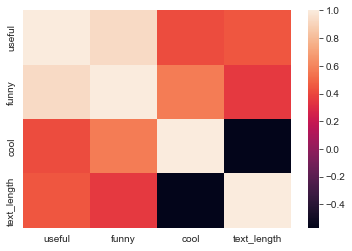

In [95]:
sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
sns.heatmap(data)


In [96]:
df_yelp_review["target"] = np.where(df_yelp_review["stars"]>=3,1,0)
df_yelp_review[['text','target']]

,text,target
0,"If you decide to eat here, just be aware it is...",1
1,I was really between 3 and 4 stars for this on...,1
2,My boyfriend and I tried this deli for the fir...,1
3,Amazing biscuits and (fill in the blank). Grea...,1
4,The cafe was extremely cute. We came at 8am an...,1
...,...,...
3080574,We redesigned my moms dress and mad it complet...,1
3080575,"This spot offers a great, affordable east week...",1
3080576,This Home Depot won me over when I needed to g...,1
3080577,For when I'm feeling like ignoring my calorie-...,1


In [97]:
from wordcloud import WordCloud
from os import path
from PIL import Image

pos = df_yelp_review[df_yelp_review['target'] == 1]['text'][:20000]
neg = df_yelp_review[df_yelp_review['target'] == 0]['text'][:50000]


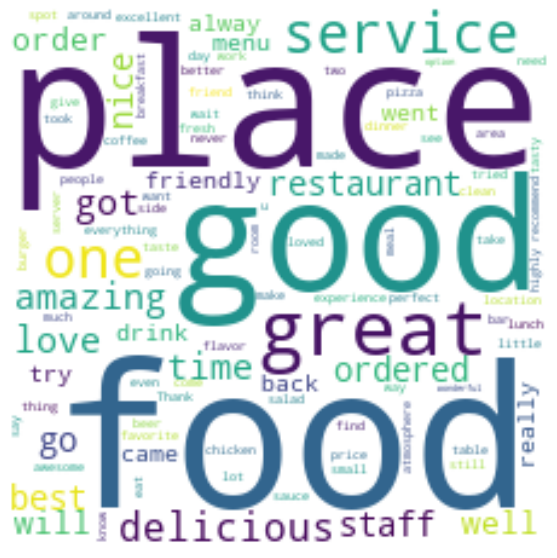

In [98]:
text_pos = " ".join(i for i in pos)
pos_mask = np.array(Image.open('heart.png'))
wc_pos = WordCloud(background_color="white", max_words=100, mask=pos_mask, contour_width=10, contour_color='firebrick')
wc_pos.generate(text_pos)

plt.figure(figsize=(14,10))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

In [99]:
neg.head()

6     Skip this train wreck if you are looking for d...
18    The service here has gone down. We used to go ...
21    Before I share the main issue, I want to share...
29    LYING SCAMMERS. BAIT AND SWITCH. Will try and ...
35    Very unhappy, you lost a valued customer. We h...
Name: text, dtype: object

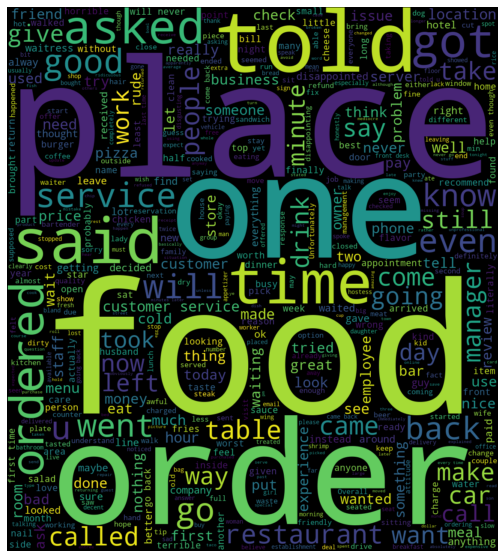

In [100]:
text_neg = " ".join(i for i in neg)
neg_mask = np.array(Image.open('thumbsdown.png'))
wc_neg= WordCloud(background_color="black", max_words=500, mask=neg_mask, contour_width=10, contour_color='firebrick')
wc_neg.generate(text_neg)

plt.figure(figsize=(14,10))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis("off")
plt.show()

Lets Analyse the best resturants:
Our client being CoffeeKing is a new startup coffee company , lets analyse Starbucks first:



In [101]:
df_starbucks_only = df_yelp_business_restaurants.loc[df_yelp_business_restaurants['name'] == 'Starbucks']
# filter reviews for only Starbucks
df_starbucks_review = df_yelp_review.loc[df_yelp_review['business_id'].isin(df_starbucks_only.business_id)]
# pre process the text
df_starbucks_review['text_clear'] = df_starbucks_review['text'].apply(preprocess)

df_starbucks_review_pos = df_starbucks_review.loc[df_starbucks_review["target"] == 1] #positive reviews


C:\Users\kulpr\AppData\Local\Temp\ipykernel_1236\344563758.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_starbucks_review['text_clear'] = df_starbucks_review['text'].apply(preprocess)


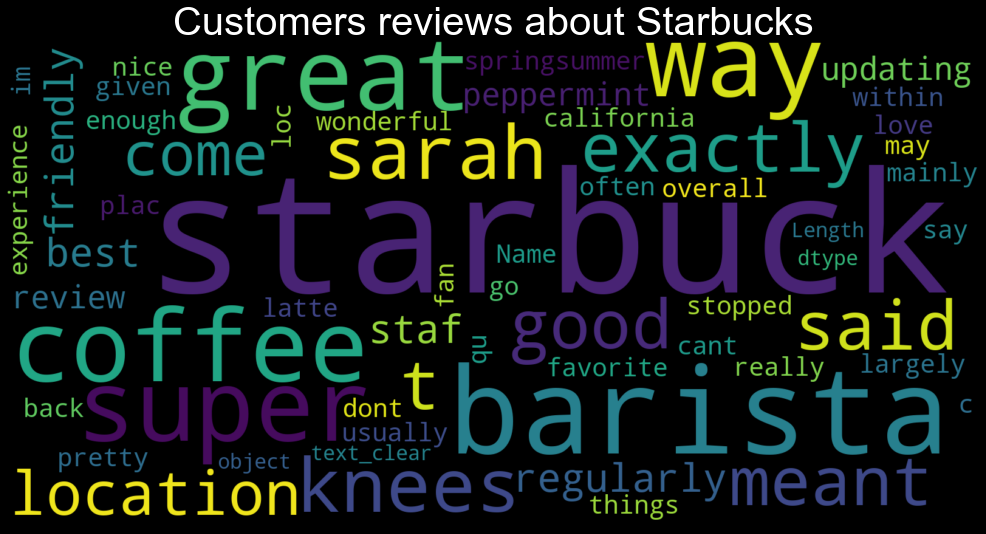

In [102]:


# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000)
# generate word cloud
wc.generate(str(df_starbucks_review_pos['text_clear']))
# figure of graph
plt.figure(figsize=(20,10), facecolor='k')
# add the title to the graph
plt.title("Customers reviews about Starbucks", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# finally show the plot
plt.show()



In [103]:
df_oceana_grill_only = df_yelp_business_restaurants.loc[df_yelp_business_restaurants['name'] == 'Oceana Grill']
# filter reviews for only McDonalds
df_oceana_grill_review = df_yelp_review.loc[df_yelp_review['business_id'].isin(df_oceana_grill_only.business_id)]
# pre process the text
df_oceana_grill_review['text_clear'] = df_oceana_grill_review['text'].apply(preprocess)
df_oceana_grill_review_pos = df_oceana_grill_review.loc[df_oceana_grill_review["target"] == 1]

C:\Users\kulpr\AppData\Local\Temp\ipykernel_1236\1957047992.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oceana_grill_review['text_clear'] = df_oceana_grill_review['text'].apply(preprocess)


In [104]:
df_coffee_only = df_yelp_business_restaurants.loc[df_yelp_business_restaurants["Restaurants"] == "Coffee & Tea"]
# filter reviews for only Cofee Businesses 
df_coffee_only_review = df_yelp_review.loc[df_yelp_review['business_id'].isin(df_coffee_only.business_id)]
# pre process the text
df_coffee_only_review['text_clear'] = df_coffee_only_review['text'].apply(preprocess)
df_coffee_only_review_pos =df_coffee_only_review.loc[df_coffee_only_review["target"] == 1]

C:\Users\kulpr\AppData\Local\Temp\ipykernel_1236\3037320837.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coffee_only_review['text_clear'] = df_coffee_only_review['text'].apply(preprocess)


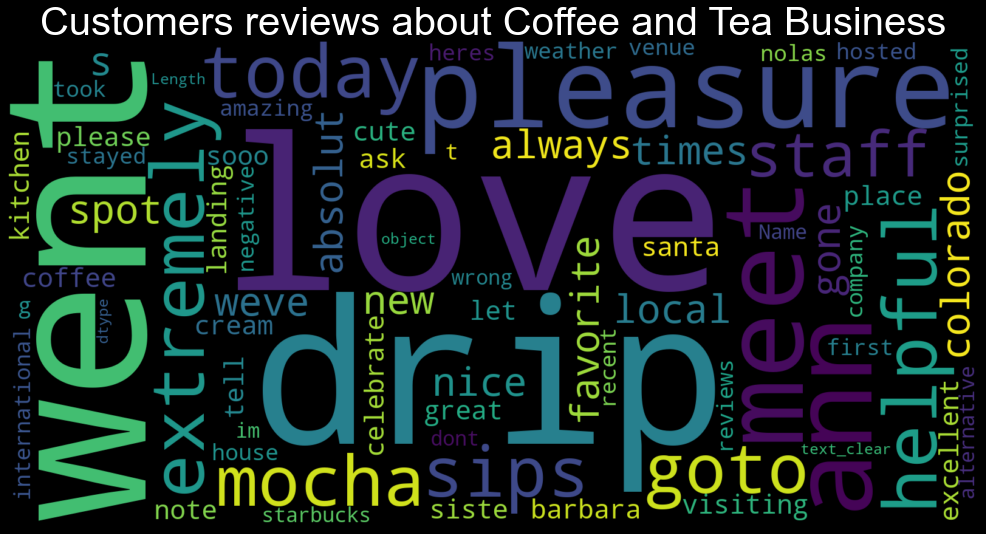

In [105]:
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud
wc.generate(str(df_coffee_only_review_pos['text_clear']))
# figure of graph
plt.figure(figsize=(20,10), facecolor='k')
# add the title to the graph
plt.title("Customers reviews about Coffee and Tea Business", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# finally show the plot
plt.show()

In [106]:
df_american_only = df_yelp_business_restaurants.loc[df_yelp_business_restaurants['category'] == 'American']
# filter reviews for only McDonalds
df_american_only_review = df_yelp_review.loc[df_yelp_review['business_id'].isin(df_american_only.business_id)]
# pre process the text
df_american_only_review['text_clear'] = df_american_only_review['text'].apply(preprocess)
df_american_only_review_pos = df_american_only_review.loc[df_american_only_review["target"] == 1]

C:\Users\kulpr\AppData\Local\Temp\ipykernel_1236\363289941.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_american_only_review['text_clear'] = df_american_only_review['text'].apply(preprocess)


In [107]:
df_Green_Eggs_only = df_yelp_business_restaurants.loc[df_yelp_business_restaurants['name'] == 'Green Eggs Café']
# filter reviews for only 'Green Eggs Café'
df_Green_Eggs_review = df_yelp_review.loc[df_yelp_review['business_id'].isin(df_Green_Eggs_only.business_id)]
# pre process the text
df_Green_Eggs_review['text_clear'] = df_Green_Eggs_review['text'].apply(preprocess)
df_Green_Eggs_review_pos = df_Green_Eggs_review.loc[df_Green_Eggs_review["target"] == 1]

C:\Users\kulpr\AppData\Local\Temp\ipykernel_1236\1725638813.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Green_Eggs_review['text_clear'] = df_Green_Eggs_review['text'].apply(preprocess)


Lets load the "Checkin Dataset" and analyse the user review :


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_yelp_review["text"] = df_yelp_review["text"].apply(preprocess)
df_yelp_review["text"][:5]

X = df_yelp_review["text"]
y = df_yelp_review["target"]

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=4)

In [109]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = CountVectorizer(min_df = 5, ngram_range = (1,2)).fit(X_train)


vect.get_feature_names()[::2000]


C:\Users\kulpr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'absolute classic',
 'accent hard',
 'accommodate four',
 'accordingly unfortunately',
 'acme super',
 'activity planned',
 'actually pasta',
 'add professional',
 'adding peppers',
 'addl',
 'admitted much',
 'advantage rent',
 'aesthetic overall',
 'afternoon pickup',
 'aggressive wouldnt',
 'agreed bit',
 'air dryers',
 'akia',
 'alignment arrived',
 'allowed exchange',
 'almost scared',
 'along pieces',
 'already successful',
 'also dramatically',
 'also pink',
 'also yet',
 'always allow',
 'always rest',
 'amazing coming',
 'amazing receptionists',
 'ambiance offer',
 'amidst covid',
 'ample size',
 'animals fed',
 'another bracelet',
 'another tourist',
 'antiques vintage',
 'any illness',
 'any whipped',
 'anyone water',
 'anything tire',
 'anywho service',
 'apologize overall',
 'apparently burger',
 'appetite service',
 'appetizers summer',
 'appointment erin',
 'appreciate kitchen',
 'appropriate staffing',
 'arde',
 'area paying',
 'arent bored',
 'around although',

In [110]:
X_train_vectorised = vect.transform(X_train)


In [111]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',max_iter=10000)
model.fit(X_train_vectorised, y_train)

LogisticRegression(max_iter=10000)

In [112]:
from sklearn.metrics import roc_auc_score
predictions = model.predict(vect.transform(X_test))
print("AUC : ",roc_auc_score(y_test,predictions))

AUC :  0.9255529524270494


In [113]:
feature_names = np.array(vect.get_feature_names())
sorted_coef_index = model.coef_[0].argsort()
print('Smallest Coefs : \n{}\n'.format(feature_names[sorted_coef_index[:100]]))
print('Largest Coefs : \n{}\n'.format(feature_names[sorted_coef_index[:-100:-1]]))

C:\Users\kulpr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Smallest Coefs : 
['two stars' 'fair best' 'second star' 'never coming' 'experienced better'
 'not recommend' 'negative stars' 'dont recommend' 'rudest' 'worst'
 'no stars' 'recommend avoiding' 'zero stars' 'never recommend'
 'giving two' 'slowest' 'two star' 'never back' 'average best'
 'less helpful' 'cockroaches' 'not pleased' 'not honest' 'no thank'
 'stars star' 'used great' 'nastiest' 'wish read' 'wouldnt recommend'
 'subpar best' 'none good' 'ok best' 'driest' 'cant support' 'minus three'
 'used excellent' 'disgrace' 'greasiest' 'mediocre best' 'not helpful'
 'never return' 'best mediocre' 'reason two' 'could great' 'decent best'
 'no thanks' 'may good' 'definitely last' 'not coming' 'wanted love'
 'ripoff' 'scam' 'never returning' 'not tasty' 'cockroach' 'might great'
 'first last' 'not returning' 'used love' 'thanks nothing' 'hoping great'
 'want love' 'used best' 'used awesome' 'thanks lot' 'two starts'
 'not accommodating' 'could fun' 'roaches' 'give minus' 'used favorite'
 

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df = 5).fit(X_train)
X_train_vectorized = vect.transform(X_train)

In [118]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
prdeictions = model.predict(vect.transform(X_test))
print('AUC : ',roc_auc_score(y_test,predictions))

C:\Users\kulpr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC :  0.9255529524270494


In [120]:
feature_names = np.array(vect.get_feature_names())


sorted_coef_index = model.coef_[0].argsort()
print('Smallest Coefs : \n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs : \n{}\n'.format(feature_names[sorted_coef_index[:-10:-1]]))

Smallest Coefs : 
['worst' 'poisoning' 'horrible' 'not' 'scam' 'terrible' 'disgusting'
 'awful' 'rudest' 'zero']

Largest Coefs : 
['delicious' 'amazing' 'great' 'excellent' 'awesome' 'perfect'
 'perfection' 'fantastic' 'best']



In [124]:
df_starbucks_only = df_yelp_business_restaurants.loc[df_yelp_business_restaurants['name'] == 'Starbucks']
# filter reviews for only Starbucks
df_starbucks_review = df_yelp_review.loc[df_yelp_review['business_id'].isin(df_starbucks_only.business_id)]
# pre process the text


df_starbucks_review_pos = df_starbucks_review.loc[(df_starbucks_review["target"] == 1) & (df_starbucks_review["target"] == 0)]

C:\Users\kulpr\AppData\Local\Temp\ipykernel_1236\2768584113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_starbucks_review['text_clear'] = df_starbucks_review['text']


In [130]:
X = df_starbucks_review["text"]
y = df_starbucks_review["target"]
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=4)

In [131]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = CountVectorizer(min_df = 5, ngram_range = (1,2)).fit(X_train)


vect.get_feature_names()[::2000]



C:\Users\kulpr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa', 'good minutes', 'refresher']

In [132]:
X_train_vectorised = vect.transform(X_train)

In [133]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',max_iter=10000)
model.fit(X_train_vectorised, y_train)

LogisticRegression(max_iter=10000)

In [134]:
from sklearn.metrics import roc_auc_score
predictions = model.predict(vect.transform(X_test))
print("AUC : ",roc_auc_score(y_test,predictions))

AUC :  0.861943586392618


In [136]:
feature_names = np.array(vect.get_feature_names())
sorted_coef_index = model.coef_[0].argsort()
print('Smallest Coefs : \n{}\n'.format(feature_names[sorted_coef_index[:100]]))
print('Largest Coefs : \n{}\n'.format(feature_names[sorted_coef_index[:-100:-1]]))

Smallest Coefs : 
['worst' 'rude' 'ridiculous' 'horrible' 'mins' 'min' 'consistently'
 'disappointing' 'worst starbucks' 'not good' 'slowest' 'terrible'
 'disgusting' 'slow' 'bathroom' 'sign' 'least' 'slowest starbucks' 'awful'
 'serve' 'flies' 'stuck' 'water' 'arrived' 'understaffed' 'new location'
 'bad' 'mess' 'never going' 'unacceptable' 'left' 'not great'
 'inconsistent' 'standards' 'didnt even' 'nasty' 'wont' 'eggnog'
 'inconvenience' 'late' 'starbucks not' 'onto' 'means' 'company'
 'somewhere' 'dirty' 'single time' 'whats' 'least favorite' 'minutes'
 'poor' 'zero' 'not friendly' 'enjoy coffee' 'burnt' 'no one' 'irritated'
 'whole' 'decide' 'old' 'much better' 'clearly' 'finally' 'attitude' 'oh'
 'sucks' 'dont know' 'unpleasant' 'half' 'prices' 'bagel' 'cinnamon'
 'coffee shop' 'sick' 'took minutes' 'making drinks' 'money' 'said' 'any'
 'really want' 'last' 'put' 'time get' 'wouldnt' 'cashier' 'forever'
 'poorly' 'shame' 'fake' 'register' 'overwhelmed' 'send' 'birthday'
 'go diff

In [ ]:
new_df_words = pd.DataFrame(columns=vect_1.get_feature_names(), data=X_train1.toarray())
new_df_words

In [ ]:
#counting most repetitive words 
word_counts = np.array(np.sum(X_train1, axis=0)).reshape((-1,))
words = np.array(vect_1.get_feature_names())
words_df = pd.DataFrame({"word":words, "count":word_counts})
words_df.sort_values(by="count",ascending=False).head(20)




Vectorizing the text using TF_IDF

By implementing the sklearn library, we can use TF_IDF vectorizing to find the weighted words that occur more frequently in the document that leads to creation of the bag of words model. So our features will be the words or sequence of words of these reviews. We are going to explore different models with the combinations of n_grams (unigrams,bigrams,trigrams).


In [ ]:
f = open("yelp_academic_dataset_user.json", encoding = "utf-8")
reader = pd.read_json(f,orient="records",lines=True,dtype=rd_types,chunksize=1000)

for chunk in reader:
    reduced_chunk=chunk
    b_pandas.append(reduced_chunk)
df_yelp_user=pd.concat(b_pandas,ignore_index=True)

df_yelp_user.head()

In [ ]:
df_yelp_checkin.describe()

Lets load the dataset "Tip Dataset" and analyse this dataset : 

In [ ]:
f = open("yelp_academic_dataset_tip.json", encoding = "utf-8")
reader = pd.read_json(f, orient = "records", lines = True, dtype = rd_types, chunksize = 1000)
b_pandas = []
for chunk in reader:
    reduced_chunk = chunk.query("`date`>'2017-12-01'")
    b_pandas.append(reduced_chunk)
df_tip = pd.concat(b_pandas, ignore_index = True)    

df_tip.head()


In [ ]:
df_tip.describe()

Lets load the "User Dataset" and analyse the users on the platform :

In [ ]:
df_user.describe()